# Exploratory Data Analysis - FoxBase

### Import all the required libraries

In [1]:
import numpy as np;
import pandas as pd; 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline


from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from PredictFFT import PredictFFT

### Load the dataset

In [2]:
# Load all the excel sheets seperately by using pandas -'pd.read_excel' command. For instance, data frame-df1 contains first sheet, df2 contains second sheet and so on.... 
xlsx = pd.ExcelFile('/Users/meghanasambrani/Documents/Foxbase/Assesement center/insights_0010_de_DE_data_from_2022-01-01_until_2022-12-06.xlsx')
df1 = pd.read_excel(xlsx, 'Daily Numbers', index_col='date', parse_dates=['date'])
df2 = pd.read_excel(xlsx, 'Page Exits')
df3 = pd.read_excel(xlsx, 'Answer Clicks')
df4 = pd.read_excel(xlsx, 'User Inputs')
df5 = pd.read_excel(xlsx, 'Daily Product Interactions')

In [3]:
# we can combine multiple sheets by using pandas - 'pd.concat' command. This command is used if there is any relation between different sheets and can be combined in one excel sheet.
# df conatins the three sheets, 'Answer Clicks','User Inputs' and 'Daily Product Interactions'. 
sheets = ['Answer Clicks','User Inputs', 'Daily Product Interactions']
df = pd.concat([pd.read_excel('/Users/meghanasambrani/Documents/Foxbase/Assesement center/insights_0010_de_DE_data_from_2022-01-01_until_2022-12-06.xlsx', sheet_name = sheet) for sheet in sheets], ignore_index = True)


In [4]:
# Assigning the date column as datetime format, which will be useful for time series analysis.
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [5]:
# using head() command we can check the top 5 rows in the dataset.
#below we can see the top 5 rows for the data saved in dataframe - df.
df.head()

,questionNumber,pageHeader,questionTitle,answerText,answerCount,%,questionType,userId,questionId,userInput,customerProductId,productName,interactionType
date,,,,,,,,,,,,,
NaT,0.00,Kategorie,Bitte wählen Sie die gewünschte Kategorie,Akustik-Deckenbekleidungen / -Unterdecken,7743.0,7.91%,buttons,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Akustik-Vorsatzschalen,1753.0,1.79%,buttons,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Deckenbekleidungen / Unterdecken innen,26673.0,27.25%,buttons,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Innenwände,41966.0,42.87%,buttons,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Schachtwände,7730.0,7.90%,buttons,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# using tail() command we can check the bottom 5 rows in the dataset.
#below we can see the bottom 5 rows for the data saved in dataframe - df.
df.tail()

,questionNumber,pageHeader,questionTitle,answerText,answerCount,%,questionType,userId,questionId,userInput,customerProductId,productName,interactionType
date,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W629C-3.de,D-scrollToTab-Materialliste
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W629C-3.de,D-materialListPDFDownloadList-Datenblatt
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W629C-3.de,D-scrollToTab-Materialliste
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ff4c9580-7561-11ed-98f6-b9d15d8d0bba,NaN,NaN,1034795.0,W125-F90-04.de,R-api-Details
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W125-F90-04.de,D-backButton-Zurück


In [7]:
# display what is there in the data for the first excel sheet,df1 - 'Daily Numbers'.
df1

,sessionCount,requestCount,requestBounceCount,requestCompletionCount,requestExitCount,ctaCount
date,,,,,,
2022-01-01,57,114,48,56,10,27
2022-01-02,90,193,78,98,17,60
2022-01-03,283,580,263,297,20,132
2022-01-04,314,609,293,277,39,98
2022-01-05,287,585,268,285,32,139
...,...,...,...,...,...,...
2022-12-02,269,400,52,298,49,169
2022-12-03,131,177,31,126,20,74
2022-12-04,130,176,29,129,18,80


In [8]:
# using shape method we can check the number of cases as well as number of fields.
df1.shape

(340, 6)

### Summary of the data

The “info()” and “describe()” methods can also be used to provide additional information about the data set. The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [9]:
# checking the summary of the data for first excel sheet df1 - 'Daily Numbers' using pandas 'info' command.
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2022-01-01 to 2022-12-06
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   sessionCount            340 non-null    int64
 1   requestCount            340 non-null    int64
 2   requestBounceCount      340 non-null    int64
 3   requestCompletionCount  340 non-null    int64
 4   requestExitCount        340 non-null    int64
 5   ctaCount                340 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


According to the above output, we can see that the data has 340 records, each with 6 columns and integer data type.

In [10]:
# checking the summary of the data for second excel sheet df2 - 'Page Exits' using pandas 'info' command.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   position    25 non-null     int64 
 1   pageHeader  25 non-null     object
 2   exitCount   25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


According to the above output, we can see that the data has 25 records, each with 3 columns and two integer and one object data type.

In [11]:
# checking the summary of the data for third excel sheet df3 - 'Answer Clicks' using pandas 'info' command.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   questionNumber  54 non-null     object 
 1   pageHeader      54 non-null     object 
 2   questionTitle   54 non-null     object 
 3   answerText      151 non-null    object 
 4   answerCount     124 non-null    float64
 5   %               70 non-null     object 
 6   questionType    70 non-null     object 
dtypes: float64(1), object(6)
memory usage: 8.4+ KB


According to the above output, we can see that the data has uneven records, each with seven columns and six object and one float data type.

In [12]:
# checking the summary of the data for fourth excel sheet df4 - 'User Inputs' using pandas 'info' command.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78974 entries, 0 to 78973
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          35098 non-null  object 
 1   questionId      78974 non-null  object 
 2   questionType    78974 non-null  object 
 3   questionNumber  78974 non-null  float64
 4   userInput       78974 non-null  float64
 5   questionTitle   78974 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.6+ MB


According to the above output, we can see that the data has uneven records, each with six columns and four object and two float data type.

In [13]:
# checking the summary of the data for fifth excel sheet df5 - 'Daily Product Interactions' using pandas 'info' command.
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54093 entries, 0 to 54092
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               340 non-null    datetime64[ns]
 1   userId             26738 non-null  object        
 2   customerProductId  37475 non-null  float64       
 3   productName        53985 non-null  object        
 4   interactionType    54093 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.1+ MB


According to the above output, we can see that the data has uneven records, each with five columns and three object, one float and one datetime data type.

###  Statistical summary using “describe()”

The “describe()” DataFrame method returns summary statistics for a quick and simple description of the data. These include count, mean, median, mode, minimum value, maximum value, range, and standard deviation.

In [14]:
# check numeric data for first excel sheet df1 - 'Daily Numbers' with "describe()".
df1.describe()

,sessionCount,requestCount,requestBounceCount,requestCompletionCount,requestExitCount,ctaCount
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,257.852941,398.838235,108.055882,254.744118,35.273529,130.738235
std,130.810280,238.621435,124.342304,133.777638,21.873703,60.432846
min,3.000000,7.000000,2.000000,5.000000,0.000000,2.000000
25%,130.750000,205.250000,31.750000,127.750000,19.000000,75.000000
50%,287.000000,390.000000,55.000000,279.500000,33.000000,133.000000
75%,368.000000,520.750000,99.000000,359.500000,47.000000,177.000000
max,606.000000,982.000000,475.000000,820.000000,196.000000,291.000000


In [15]:
# check numeric data for second excel sheet df2 - 'Page Exits' with "describe()".
df2.describe()

,position,exitCount
count,25.000000,25.000000
mean,12.000000,478.840000
std,7.359801,488.005266
min,0.000000,18.000000
25%,6.000000,154.000000
50%,12.000000,282.000000
75%,18.000000,727.000000
max,24.000000,1682.000000


In [16]:
# check object data for third excel sheet df3 - 'Answer Clicks'  with "describe()" by including object data type, as describe shows all the statistical details only for numeric data.
df3.describe(include = 'object')

,questionNumber,pageHeader,questionTitle,answerText,%,questionType
count,54,54,54,151,70,70
unique,28,14,18,48,61,2
top,,,,Skipped,100.00%,buttons
freq,27,27,27,27,9,59


In [17]:
# check numeric data for fourth excel sheet df4 - 'User Inputs' with "describe()".
df4.describe()

,questionNumber,userInput
count,78974.000000,7.897400e+04
mean,9.619368,2.870858e+03
std,6.815621,7.836538e+05
min,3.000000,1.000000e-02
25%,4.000000,2.800000e+00
50%,6.000000,4.000000e+00
75%,18.000000,4.500000e+01
max,24.000000,2.202202e+08


### Finding the number of missing values

In [18]:
# total number of missing values in each column for first excel sheet df1 - 'Daily Numbers'.
df1.isnull().sum()

sessionCount              0
requestCount              0
requestBounceCount        0
requestCompletionCount    0
requestExitCount          0
ctaCount                  0
dtype: int64

In [19]:
# total number of missing values in each column for second excel sheet df2 - 'Page Exits'.
df2.isnull().sum()

position      0
pageHeader    0
exitCount     0
dtype: int64

In [20]:
# total number of missing values in each column for third excel sheet df3 - 'Answer Clicks'.
df3.isnull().sum()

questionNumber    97
pageHeader        97
questionTitle     97
answerText         0
answerCount       27
%                 81
questionType      81
dtype: int64

In [21]:
# total number of missing values in each column for fourth excel sheet df4 - 'User Inputs'.
df4.isnull().sum()

userId            43876
questionId            0
questionType          0
questionNumber        0
userInput             0
questionTitle         0
dtype: int64

In [22]:
# total number of missing values in each column for fifth excel sheet df5 - 'Daily Product Interactions'.
df5.isnull().sum()

date                 53753
userId               27355
customerProductId    16618
productName            108
interactionType          0
dtype: int64

### Month wise KPI plot

Text(0.5, 0, 'Month')

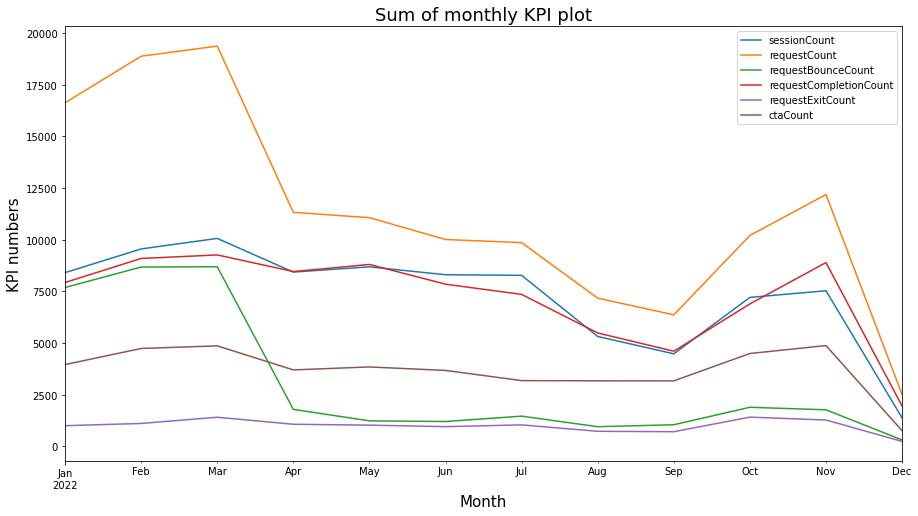

In [23]:
# checking the monthly trend of KPI's for 2022 for first excel sheet df1 - 'Daily Numbers'.

monthly=df1.resample('M').sum()
monthly.plot(figsize=(15,8))
plt.title("Sum of monthly KPI plot",fontsize=18)
plt.ylabel('KPI numbers',fontsize=15)
plt.xlabel('Month',fontsize=15)

From the above chart, we can observe that,
* session count -  the highest number i.e., 10067 of users interacting with the selectors was in march 2022, while the least was in september with 4480 numbers. 
* request count - the highest number i.e., 19374 selectors called via the browser was in march 2022, while the least was in september with 6367 numbers.  
* As a request consists of 3 types, requestBounceCount,requestCompletionCount and requestExitCount, summing up all these three values we get the total request count. For instance, if we check the values of all three types for march 2022, which is 8695 for requestBounceCount,9267 for requestCompletionCount and 1411 for requestExitCount, adding these values we get a total of 19373 request count.
* ctaCount - the maximum number of any hyperlink/button clicked by user on the results page is 4879 in november 2022, while the least was in september with 3171 numbers.

Note: Data from december 2022 is not considered as the total data is not availble for the same. 

### Week wise KPI plot

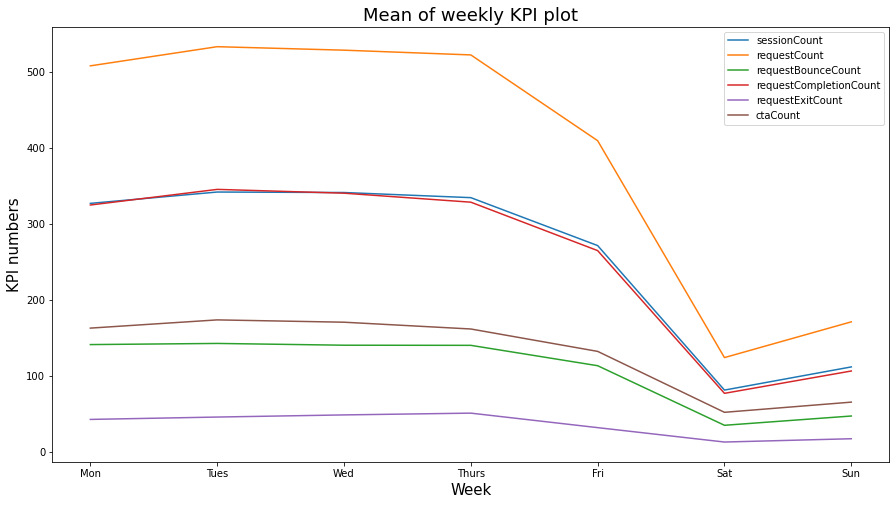

In [24]:
# checking the mean of weekly trend of KPI's for 2022 for first excel sheet df1 - 'Daily Numbers'.

by_weekday = df1.groupby(df1.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(figsize=(15,8))
plt.title("Mean of weekly KPI plot",fontsize=18)
plt.ylabel('KPI numbers',fontsize=15)
plt.xlabel('Week',fontsize=15);

From the above plot, we can see that, users are accessing the selectors or calling the selectors majority on week days i.e., on tuesdays, wednesdays and thursdays. While the least count is on saturdays for all the KPI's.

### Quarterly KPI values

In [25]:
# checking the sum of quarterly KPI values for 2022 using resample('QS') command for first excel sheet df1 - 'Daily Numbers'.
df1.resample('QS').sum()

,sessionCount,requestCount,requestBounceCount,requestCompletionCount,requestExitCount,ctaCount
date,,,,,,
2022-01-01,28033,54887,25066,26295,3523,13564
2022-04-01,25434,32408,4232,25119,3055,11224
2022-07-01,18078,23404,3465,17452,2482,9529
2022-10-01,16125,24906,3976,17747,2933,10134


In the above table, we can see a decline of all KPI values from first quarter to the third quarter.

### Sorting

In [26]:
# data in dataframe - df is sorted using pandas 'sort_values' command with respect to answerCount in descending order . Only top 20 rows are shown using head(20) command.
df.sort_values(by="answerCount", ascending=False).head(20)

,questionNumber,pageHeader,questionTitle,answerText,answerCount,%,questionType,userId,questionId,userInput,customerProductId,productName,interactionType
date,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,Total,97881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Innenwände,41966.0,42.87%,buttons,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Total,38655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Total,36897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Total,36241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Total,33228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Deckenbekleidungen / Unterdecken innen,26673.0,27.25%,buttons,NaN,NaN,NaN,NaN,NaN,NaN
NaT,4.00,Wandhöhe,Bitte geben Sie die benötigte Wandhöhe an,Möglicher Bereich bis:,26301.0,100.00%,range,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,Total,25678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: In the above table, we can see a lot of missing values(NaN), as the merged cells in the excel sheets are considered as  empty values in the dataset.

In [27]:
# DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by 'exitCount' for the second excel sheet df2 - 'Page Exits'(ascending=False to sort in descending order).
df2.sort_values(by="exitCount", ascending=False)

,position,pageHeader,exitCount
3,3,Schallschutz,1682
18,18,Raumbreite,1435
2,2,Brandschutz,1277
6,6,Wandhöhe,1131
1,1,Bauweise,1039
15,15,Rohdecke,979
4,4,Wandhöhe,727
20,20,Revisionierbarkeit,498
13,13,Wandhöhe,371
19,19,Deckenhohlraum/Abhängehöhe,362


According to the above table, we can see that the Schallschutz pageHeader has the maximum exitCount of 1682 and the minimum is Raumbreite with 18 exitCounts.

### Pairplot

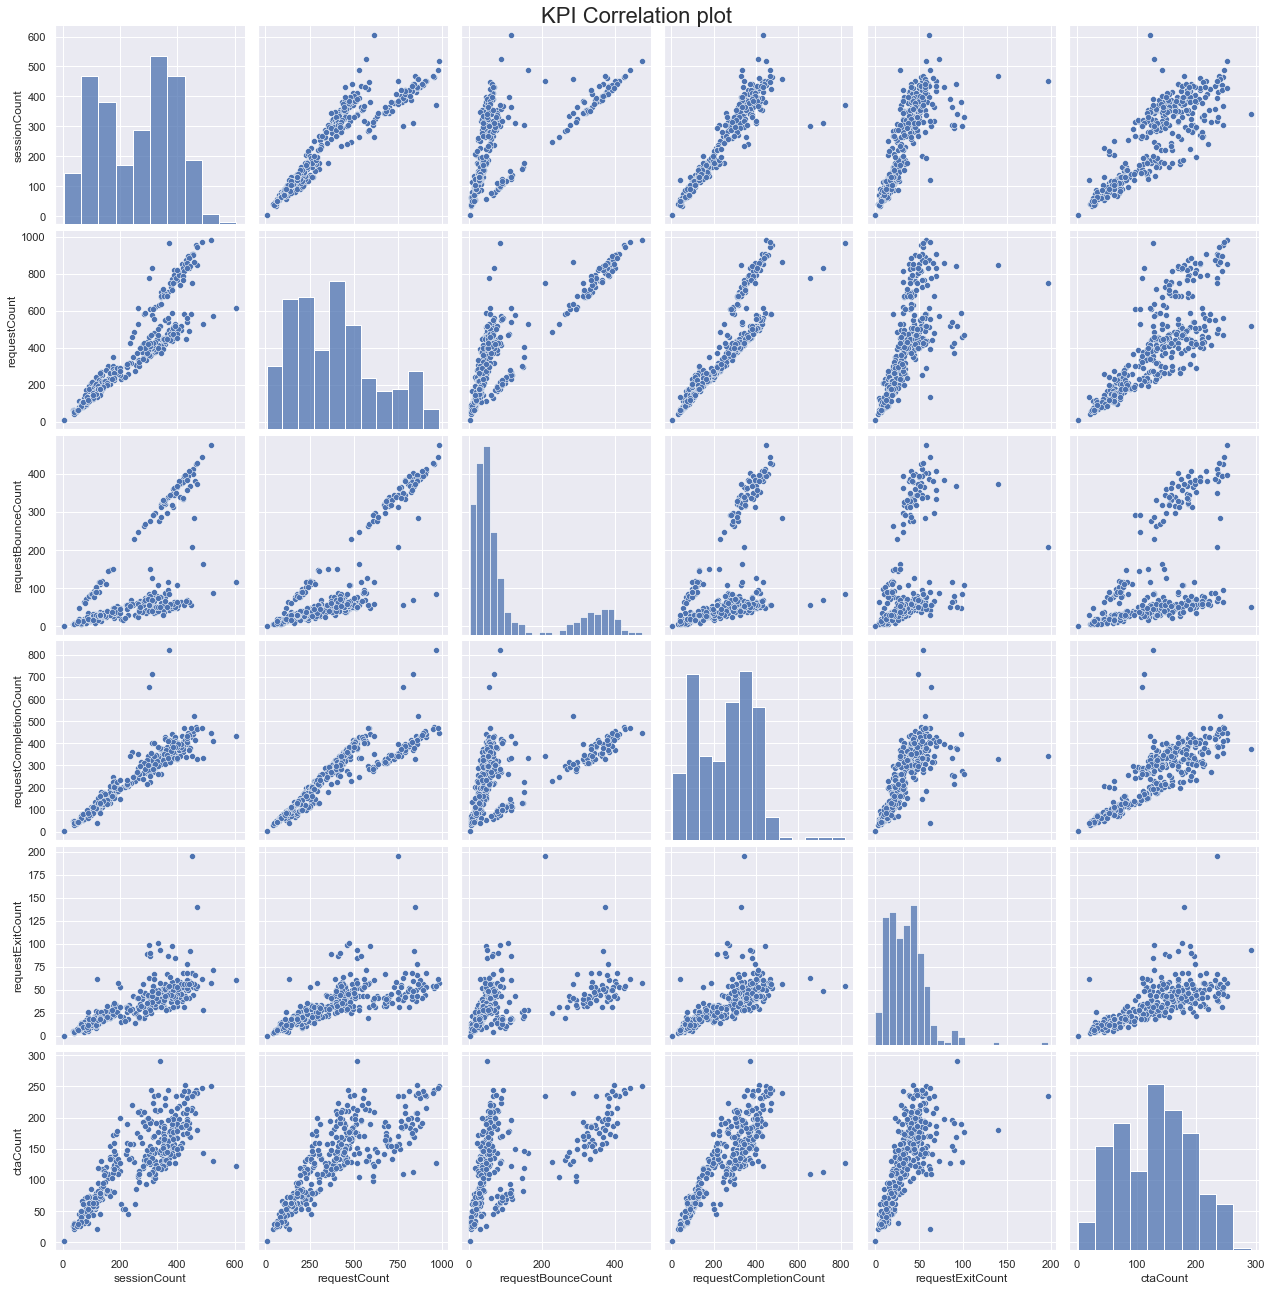

In [28]:
#Plot pairwise relationships in a dataset for first excel sheet df1 - 'Daily Numbers'. 
sns.set()
correlation_plot = sns.pairplot(df1, height = 3)
correlation_plot.fig.suptitle("KPI Correlation plot", y=1.0, fontsize=22)
plt.show();

The pairplot function creates a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown above.
The key take away from the above plot is that all the KPI's have positive correlation and few outliers which does not fit with other data points.

### Daily numbers plot

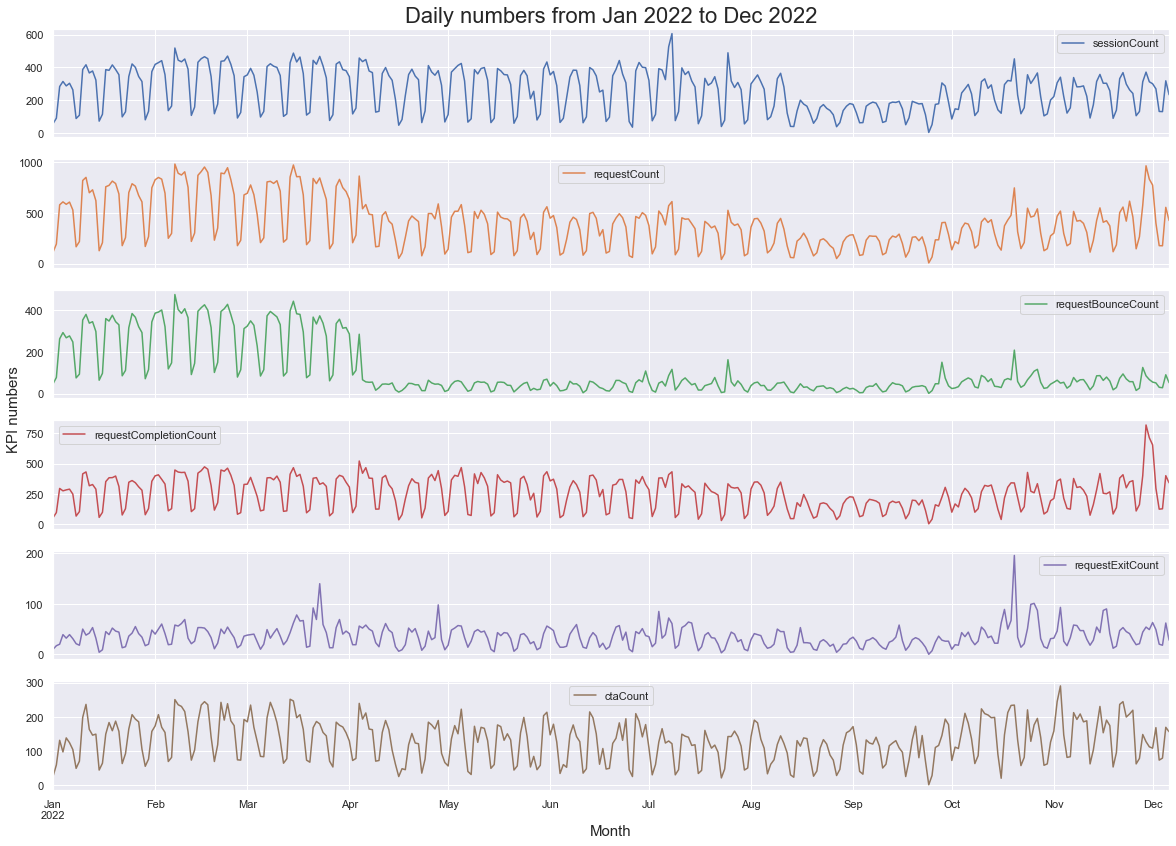

In [29]:
# plotting the daily numbers of all five KPI's for 2022.
df1['2022-01':'2022-12'].plot(subplots=True, figsize=(20,14))
plt.title('Daily numbers from Jan 2022 to Dec 2022', y=7.0, fontsize=22)
plt.ylabel('KPI numbers',fontsize=15,y=3.5)
plt.xlabel('Month',fontsize=15)
plt.show();

The above plot depicts the detailed trend of all the KPI numbers in one figure, which will help in comparing the trends of all the KPI's month wise.

### Correlation values

In [30]:
df1.corr()['sessionCount'].sort_values()

requestBounceCount        0.600742
requestExitCount          0.745036
ctaCount                  0.834875
requestCount              0.899916
requestCompletionCount    0.925824
sessionCount              1.000000
Name: sessionCount, dtype: float64

In the above output, we can see the correlation values of 'sessionCount' with other KPI's. 'sessionCount' is highly correlated with 'requestCompletionCount' and least with 'requestBounceCount'.

### loc command

The loc command is used to access a group of rows and columns by label(s) or a boolean array

In [31]:
# Access records where the pageHeader is 'Brandschutz'. 
df2.loc[df2['pageHeader']=='Brandschutz', :]

,position,pageHeader,exitCount
2,2,Brandschutz,1277
12,12,Brandschutz,280
16,16,Brandschutz,323
17,17,Brandschutz,209


In [32]:
# Access records where the exitCount is greater than 500. 
df2.loc[df2['exitCount']>500, :]

,position,pageHeader,exitCount
1,1,Bauweise,1039
2,2,Brandschutz,1277
3,3,Schallschutz,1682
4,4,Wandhöhe,727
6,6,Wandhöhe,1131
15,15,Rohdecke,979
18,18,Raumbreite,1435


In [33]:
# count the total number of values for all the variables in pageHeader - Bauweise. 
df2.loc[df2['pageHeader']=='Bauweise', :].count()

position      4
pageHeader    4
exitCount     4
dtype: int64

### Heatmap


Heatmap is a two-dimensional visual representation of data, where values are encoded in colors, delivering a convenient, insightful view of information.

,sessionCount,requestCount,requestBounceCount,requestCompletionCount,requestExitCount,ctaCount
sessionCount,1.000000,0.899916,0.600742,0.925824,0.745036,0.834875
requestCount,0.899916,1.000000,0.840627,0.887955,0.680627,0.804017
requestBounceCount,0.600742,0.840627,1.000000,0.506423,0.403290,0.530077
requestCompletionCount,0.925824,0.887955,0.506423,1.000000,0.675278,0.826288
requestExitCount,0.745036,0.680627,0.403290,0.675278,1.000000,0.678367
ctaCount,0.834875,0.804017,0.530077,0.826288,0.678367,1.000000


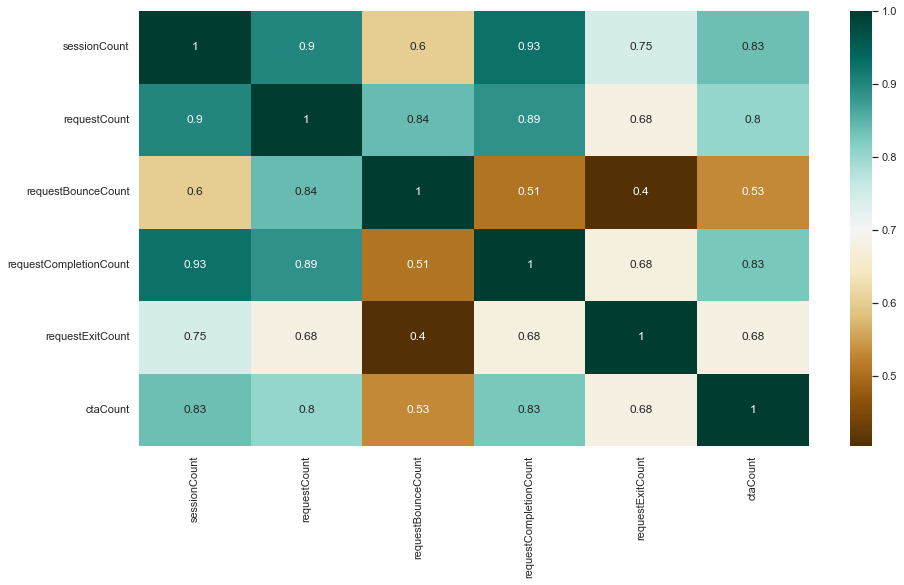

In [34]:
# heatmap for KPI's to check the correlation.
plt.figure(figsize=(15,8))
corr_heatmap = df1.corr()
sns.heatmap(corr_heatmap,cmap="BrBG",annot=True)
corr_heatmap

Positive Correlation:

* sessionCount = requestCount, requestCompletionCount, requestExitCount, ctaCount
* requestCount = sessionCount, requestBounceCount, requestCompletionCount, ctaCount, requestExitCount
* requestBounceCount = requestCount, sessionCount		
* requestCompletionCount = requestCount, sessionCount,  ctaCount, requestExitCount
* requestExitCount = requestCount, sessionCount, requestCompletionCount, ctaCount
* ctaCount = requestCount, sessionCount, requestCompletionCount, requestExitCount 


This heatmap has given the informative insights into the data.

### Boxplot

Box plot is used to display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”. These chart displays the distribution of data based on a five number summary (“minimum”, first quartile(Q1), median, third quartile(Q3) and “maximum”).

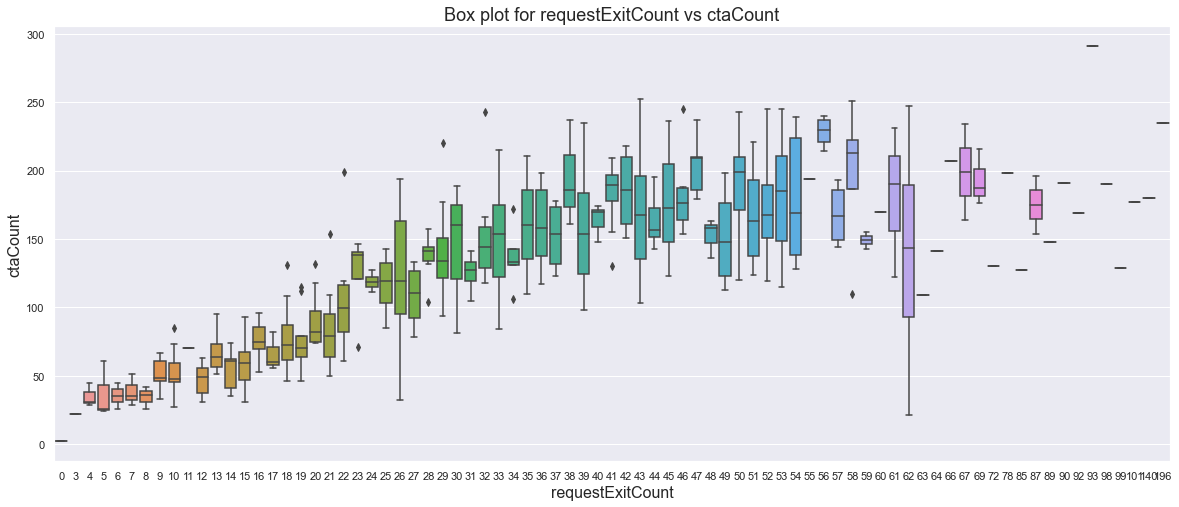

In [35]:
# Boxplot showing the relation between requestExitCount and ctaCount. 
plt.figure(figsize=(20,8))
boxplot = sns.boxplot(x="requestExitCount", y="ctaCount", data=df1)
plt.title('Box plot for requestExitCount vs ctaCount',fontsize=18)
boxplot.set_xlabel("requestExitCount", fontsize=16)
boxplot.set_ylabel("ctaCount", fontsize=16)
plt.show()

### Forecast

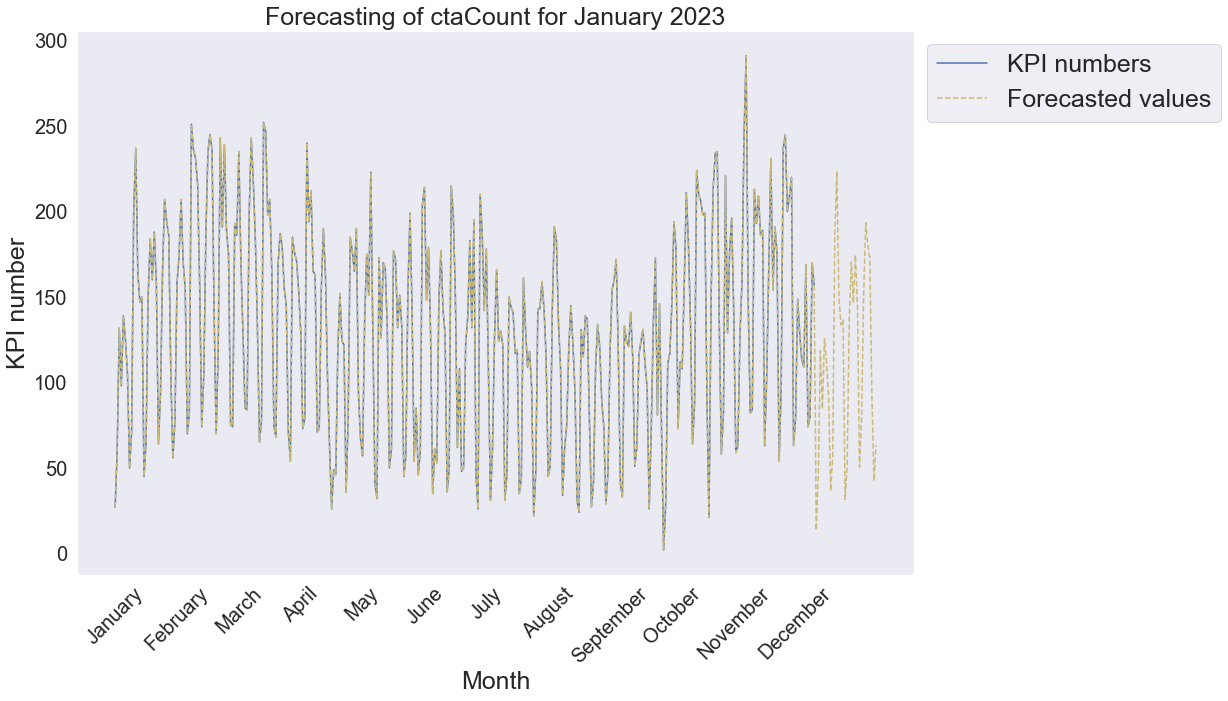

In [36]:
# Forecasting of ctaCount for January 2023 based on 2022 dataset using fast Fourier transform (FFT).
x = df1['ctaCount']

n_predict = 30 #days need to predict 

extrapolation = PredictFFT(x, n_predict)
prediction = extrapolation.fourierExtrapolation()

plt.figure(figsize=(15,10))
plt.plot(np.arange(len(x)), x, 'b', label = 'KPI numbers')
plt.plot(np.arange(len(prediction)), prediction, 'y--', label = 'Forecasted values')
plt.xlabel("Month", fontsize=25)
plt.ylabel("KPI number", fontsize=25)
plt.title("Forecasting of ctaCount for January 2023", fontsize=25)
plt.grid()
plt.legend(fontsize=25, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation =45, fontsize= 20)
plt.yticks(fontsize= 20)
plt.xticks(np.arange(0, 360, 30))
first_day_of_month = np.arange(0, 360, 30) # First day of each month
my_xticks = ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December']
plt.xticks(first_day_of_month, my_xticks)
plt.savefig("sum_2048"+'.pdf', bbox_inches = 'tight')

plt.show()

With the above plot, we can conclude that the the maximum number of any hyperlink/button clicked by user on the results page could be approximately around 230 in January 2023.

Note: We can forecast for other KPI's from dataset as well just by adding x = df1['desired KPI'] in the above code.